In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [5]:
x=np.linspace(-6,6,100)

In [9]:
y=np.sqrt(10**2-x**2)

In [13]:
y = np.hstack([y,-y])
x=np.hstack([x,-x])

In [19]:
x1 =np.linspace(-6,6,100)
y1 =np.sqrt(4**2-x1**2)
y1 = np.hstack([y1,-y1])
x1 =np.hstack([x1,-x1])

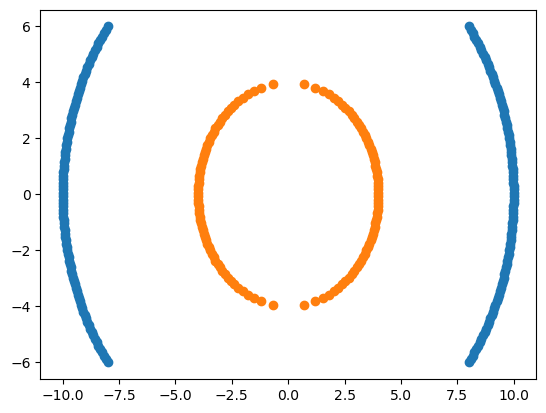

In [21]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [25]:
df1=pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2=pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df=pd.concat([df1,df2],ignore_index=True)
df

,X1,X2,Y
0,8.000000,-6.000000,0
1,8.089490,-5.878788,0
2,8.176205,-5.757576,0
3,8.260230,-5.636364,0
4,8.341649,-5.515152,0
...,...,...,...
395,NaN,-5.515152,1
396,NaN,-5.636364,1
397,NaN,-5.757576,1
398,NaN,-5.878788,1


In [27]:
df1=df.copy()

In [29]:
df1

,X1,X2,Y
0,8.000000,-6.000000,0
1,8.089490,-5.878788,0
2,8.176205,-5.757576,0
3,8.260230,-5.636364,0
4,8.341649,-5.515152,0
...,...,...,...
395,NaN,-5.515152,1
396,NaN,-5.636364,1
397,NaN,-5.757576,1
398,NaN,-5.878788,1


In [33]:
df1['x1square']=df1['X1']**2
df1['x2square']=df1['X2']**2
df1['x1x2']=df1['X1']*df1["X2"]
df1.head()

,X1,X2,Y,x1square,x2square,x1x2
0,8.000000,-6.000000,0,64.000000,36.000000,-48.000000
1,8.089490,-5.878788,0,65.439853,34.560147,-47.556397
2,8.176205,-5.757576,0,66.850321,33.149679,-47.075117
3,8.260230,-5.636364,0,68.231405,31.768595,-46.557662
4,8.341649,-5.515152,0,69.583104,30.416896,-46.005457


In [63]:
df1=df1.dropna()
x=df1[['x1square','x2square','x1x2']]
y=df1['Y']

In [65]:
x

,x1square,x2square,x1x2
0,64.000000,36.000000,-48.000000
1,65.439853,34.560147,-47.556397
2,66.850321,33.149679,-47.075117
3,68.231405,31.768595,-46.557662
4,69.583104,30.416896,-46.005457
...,...,...,...
378,4.066116,11.933884,6.965957
379,3.213958,12.786042,6.410445
380,2.332415,13.667585,5.646103
381,1.421488,14.578512,4.552271


In [67]:
y

0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    1
381    1
382    1
Name: Y, Length: 332, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

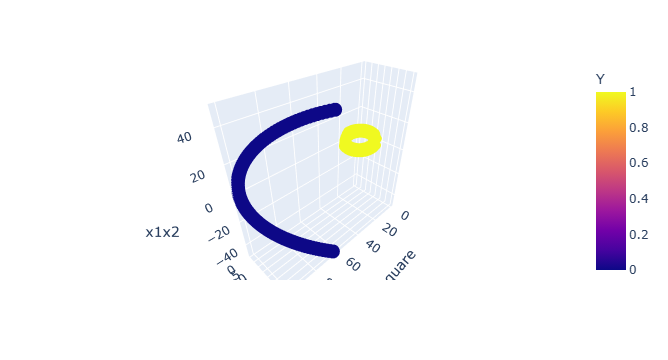

In [71]:
import plotly.express as px

fig = px.scatter_3d(df1, x='x1square', y='x2square', z='x1x2', color='Y')  
fig.show()


In [78]:
df1=df1.dropna()
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
cls = SVC(kernel ='linear')
cls.fit(x_train,y_train)
y_pred=cls.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [80]:
df=df.dropna()

In [82]:
df

,X1,X2,Y
0,8.000000,-6.000000,0
1,8.089490,-5.878788,0
2,8.176205,-5.757576,0
3,8.260230,-5.636364,0
4,8.341649,-5.515152,0
...,...,...,...
378,-2.016461,-3.454545,1
379,-1.792751,-3.575758,1
380,-1.527225,-3.696970,1
381,-1.192262,-3.818182,1


In [84]:
x=df[['X1','X2']]
y=df['Y']

In [86]:
x

,X1,X2
0,8.000000,-6.000000
1,8.089490,-5.878788
2,8.176205,-5.757576
3,8.260230,-5.636364
4,8.341649,-5.515152
...,...,...
378,-2.016461,-3.454545
379,-1.792751,-3.575758
380,-1.527225,-3.696970
381,-1.192262,-3.818182


In [88]:
y

0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    1
381    1
382    1
Name: Y, Length: 332, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [92]:
x_train

,X1,X2
365,-3.531311,-1.878788
17,9.191364,-3.939394
267,3.391233,2.121212
235,3.593178,-1.757576
88,8.844333,4.666667
...,...,...
220,1.792751,-3.575758
272,2.926087,2.727273
72,9.620914,2.727273
252,3.988505,0.303030


In [98]:
df1=df1.dropna()
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
cls = SVC(kernel ='rbf')
cls.fit(x_train,y_train)
y_pred=cls.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [100]:
df1=df1.dropna()
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
cls = SVC(kernel ='poly')
cls.fit(x_train,y_train)
y_pred=cls.predict(x_test)
accuracy_score(y_test,y_pred)

0.62

In [102]:
df1=df1.dropna()
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
cls = SVC(kernel ='sigmoid')
cls.fit(x_train,y_train)
y_pred=cls.predict(x_test)
accuracy_score(y_test,y_pred)

0.65